In [0]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [0]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [0]:
from sklearn import linear_model

In [6]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [7]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.08 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.09 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.10 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [8]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

## Implement Logistc Regression with L2 regularization Using SGD: without using sklearn

### Instructions

- Load the datasets(train and test) into the respective arrays

- Initialize the weight_vector and intercept term randomly

- Calculate the initlal log loss for the train and test data with the current weight and intercept and store it in a list

- for each epoch:
    - for each batch of data points in train: (keep batch size=1)
        - calculate the gradient of loss function w.r.t each weight in weight vector
        - Calculate the gradient of the intercept <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>
        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)} ← (1 − \frac{αλ}{N} )w^{(t)} + αx_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$ <br>
        $b^{(t+1)} ← (1 − \frac{αλ}{N} )b^{(t)} + α(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$ 
        - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
        - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
        - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


- Plot the train and test loss i.e on x-axis the epoch number, and on y-axis the loss

- <strong>GOAL</strong>: compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [9]:
import math
w = np.zeros_like(X_train[0])
b = 0
N = len(X_train)
N

37500

In [0]:
# write your code to implement SGD as per the above instructions
# please choose the number of iternations on your own

In [44]:
from tqdm import tqdm 
def sigmoid(w,x,b):
    return 1/(1+np.exp(-(np.dot(x,w)+b)))

def coefficients_SGD(x_train,x_test,y_train,y_test,n_epoch):
    coef=np.random.normal(0,0.0001, size=(len(x_train[0])))
    intcpt=np.random.normal(0,0.0001)
    lamda  = 0.0001
    alpha = 0.0001
    N=len(X_train)
    LOSS_TRAIN=[]
    LOSS_TEST=[]
    for epoch in range(n_epoch):
        for i in range(len(x_train)):
            dcoef= (x_train[i]*(y_train[i]-sigmoid(coef,x_train[i],intcpt)))
            dintcpt=(y_train[i]-sigmoid(coef,x_train[i],intcpt))
            coef=((1-(alpha*lamda)/N)*coef+(alpha*dcoef))
            intcpt=((1-(alpha*lamda)/N)*intcpt+(alpha*dintcpt))
        ypred_train= sigmoid(coef,x_train,intcpt)
        ypred_test= sigmoid(coef,x_test,intcpt)
        loss_train=0
        for i in range(len(y_train)):
                loss_train=-((y_train[i]*(math.log(ypred_train[i])))+ ((1-y_train[i])*(math.log(1-ypred_train[i]))))
        for j in range(len(y_test)):
                loss_test=-((y_test[j]*(math.log(ypred_test[j])))+ ((1-y_test[j])*(math.log(1-ypred_test[j])))) 
        Avg_Loss_Train=loss_train/len(y_train)
        LOSS_TRAIN.append(Avg_Loss_Train)
        Avg_Loss_Test=loss_test/len(y_test)
        LOSS_TEST.append(Avg_Loss_Test)
        print("epoch=",epoch,"; Loss_Train:",Avg_Loss_Train,"Loss_Test",Avg_Loss_Test)
    return coef,intcpt,LOSS_TRAIN,LOSS_TEST

coef,intcpt,LOSS_TRAIN,LOSS_TEST=coefficients_SGD(X_train,X_test,y_train,y_test,70)

epoch= 0 ; Loss_Train: 1.769437805454955e-05 Loss_Test 9.808950018400935e-05
epoch= 1 ; Loss_Train: 1.6894228719028168e-05 Loss_Test 9.586387328161591e-05
epoch= 2 ; Loss_Train: 1.6681175908754043e-05 Loss_Test 9.093702056916448e-05
epoch= 3 ; Loss_Train: 1.6588884676066017e-05 Loss_Test 8.693895116322342e-05
epoch= 4 ; Loss_Train: 1.6532651381600616e-05 Loss_Test 8.401673286368027e-05
epoch= 5 ; Loss_Train: 1.649259273945252e-05 Loss_Test 8.191369177276093e-05
epoch= 6 ; Loss_Train: 1.6462683164730193e-05 Loss_Test 8.039381315481112e-05
epoch= 7 ; Loss_Train: 1.6440155596316022e-05 Loss_Test 7.928638201835448e-05
epoch= 8 ; Loss_Train: 1.642320591185144e-05 Loss_Test 7.847309226199616e-05
epoch= 9 ; Loss_Train: 1.641048215616865e-05 Loss_Test 7.787188617687107e-05
epoch= 10 ; Loss_Train: 1.6400944952651492e-05 Loss_Test 7.742514817683682e-05
epoch= 11 ; Loss_Train: 1.6393799948667966e-05 Loss_Test 7.709185803734507e-05
epoch= 12 ; Loss_Train: 1.6388446011269478e-05 Loss_Test 7.6842442

In [45]:
print("Coeficients:",coef)
print("\nIntercept=",intcpt)

Coeficients: [-0.42982412  0.19298994 -0.14855936  0.33811969 -0.22124232  0.56989603
 -0.44517259 -0.08998862  0.22189033  0.1737813   0.19877135 -0.00066692
 -0.08135564  0.33908197  0.02298398]

Intercept= -0.8922526913805908


In [46]:
print(coef-clf.coef_)
print("\n",intcpt-clf.intercept_)

[[-6.45720777e-03  7.51429134e-03  3.09950136e-05 -3.32437632e-03
  -1.30556184e-02  9.73024639e-03  7.25223786e-03  4.09950486e-03
   1.26171343e-02 -7.05996385e-03  1.71944496e-03 -4.88608062e-03
  -1.75194799e-03  5.53949691e-04  3.16768106e-04]]

 [-0.03911439]


# Comparison of W & B between SGD Classifier & Custom Implementation

[[-6.45720777e-03  7.51429134e-03  3.09950136e-05 -3.32437632e-03
  -1.30556184e-02  9.73024639e-03  7.25223786e-03  4.09950486e-03
   1.26171343e-02 -7.05996385e-03  1.71944496e-03 -4.88608062e-03
  -1.75194799e-03  5.53949691e-04  3.16768106e-04]]

 [-0.03911439]

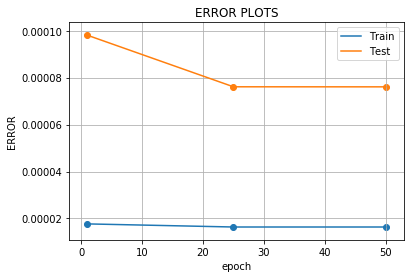

In [49]:
import matplotlib.pyplot as plt
error_train=[]
error_train.append(LOSS_TRAIN[0])
error_train.append(LOSS_TRAIN[24])
error_train.append(LOSS_TRAIN[49])

error_test=[]
error_test.append(LOSS_TEST[0])
error_test.append(LOSS_TEST[24])
error_test.append(LOSS_TEST[49])


epoch=[1,25,50]
plt.plot(epoch,error_train, label='Train')
plt.plot(epoch,error_test, label='Test')

plt.scatter(epoch,error_train)
plt.scatter(epoch,error_test)

plt.legend()
plt.xlabel("epoch")
plt.ylabel("ERROR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()